In [68]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress  

In [3]:
# read csv files
mouse_metadata = pd.read_csv("/Users/dariareichkina/Projects/Bootcamp/Matplotlib-challenge/Mouse_metadata.csv")

In [4]:
study_results = pd.read_csv("/Users/dariareichkina/Projects/Bootcamp/Matplotlib-challenge/Study_results.csv")

In [7]:
# join two csv files into one DataFrame and display DataFrame
df = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')
df.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [10]:
# Checking the number of mice
mice_number = df["Mouse ID"].nunique()
print(mice_number)

249


In [12]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate_mouse_id = df[df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]["Mouse ID"].unique()
print(duplicate_mouse_id)

['g989']


In [14]:
# Delete duplicates
df1 = df[~df["Mouse ID"].isin(duplicate_mouse_id)]
df1.head(10)
    

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [15]:
# Check unique number of mouse_id
mice_number1 = df1["Mouse ID"].nunique()
print(mice_number1)

248


In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistic = df1.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
print(summary_statistic)

                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


In [18]:
summary_statistic.reset_index(inplace=True)
df_statistic_pivot = summary_statistic.pivot_table(index='Drug Regimen', values=['mean', 'median', 'var', 'std', 'sem'])
df_statistic_pivot.columns.name = 'Tumor Volume (mm3)'
print(df_statistic_pivot)


Tumor Volume (mm3)       mean     median       sem       std        var
Drug Regimen                                                           
Capomulin           40.675741  41.557809  0.329346  4.994774  24.947764
Ceftamin            52.591172  51.776157  0.469821  6.268188  39.290177
Infubinol           52.884795  51.820584  0.492236  6.567243  43.128684
Ketapril            55.235638  53.698743  0.603860  8.279709  68.553577
Naftisol            54.331565  52.509285  0.596466  8.134708  66.173479
Placebo             54.033581  52.288934  0.581331  7.821003  61.168083
Propriva            52.320930  50.446266  0.544332  6.622085  43.852013
Ramicane            40.216745  40.673236  0.320955  4.846308  23.486704
Stelasyn            54.233149  52.431737  0.573111  7.710419  59.450562
Zoniferol           53.236507  51.818479  0.516398  6.966589  48.533355


Text(0, 0.5, '# of observed mouse timepoint')

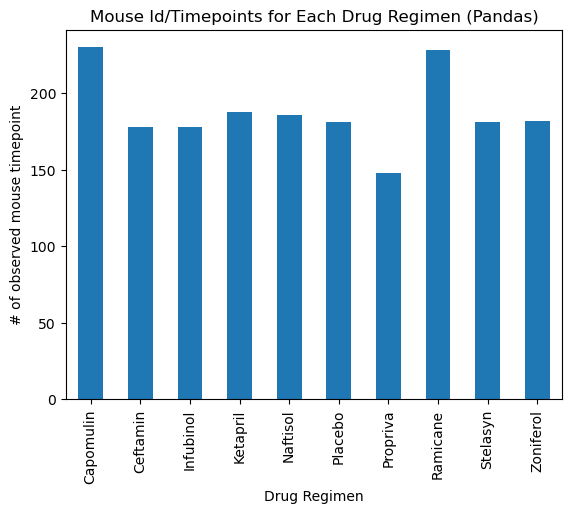

In [29]:
# Barchart using Pandas
total_rows = df1.groupby('Drug Regimen').size().reset_index(name='# of observed mouse timepoints')
ax1 = total_rows.plot(kind='bar', x='Drug Regimen', y='# of observed mouse timepoints', title='Mouse Id/Timepoints for Each Drug Regimen (Pandas)', legend=False)
ax1.set_ylabel('# of observed mouse timepoint')

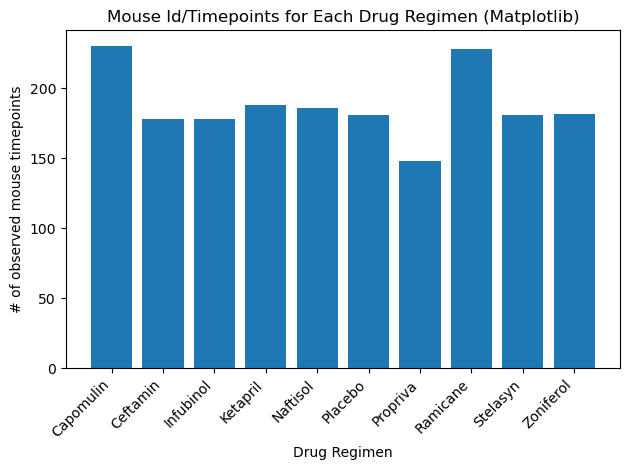

In [28]:
# Barchart using Matplotlib
plt.figure()
plt.bar(total_rows['Drug Regimen'], total_rows['# of observed mouse timepoints'])
plt.title('Mouse Id/Timepoints for Each Drug Regimen (Matplotlib)')
plt.xlabel('Drug Regimen')
plt.ylabel('# of observed mouse timepoints')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Text(0, 0.5, '')

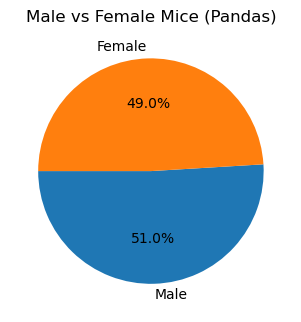

In [39]:
# Piechart of distribution of female versus male mice (Pandas)
gender = df1['Sex'].value_counts()
plt.figure(figsize=(8, 4))
ax1 = plt.subplot(121)
gender.plot(kind='pie', autopct='%1.1f%%', startangle=180, ax=ax1)
ax1.set_title('Male vs Female Mice (Pandas)')
ax1.set_ylabel('')


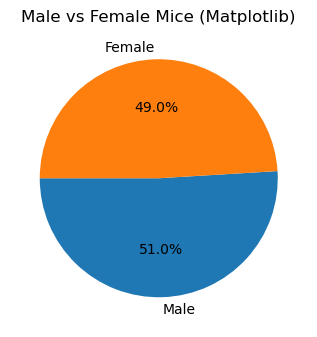

In [37]:
# Piechart of distribution of female versus male mice (Matplotlib)
ax2 = plt.subplot(122)
ax2.pie(gender, labels=gender.index, autopct='%1.1f%%', startangle=180)
ax2.set_title('Male vs Female Mice (Matplotlib)')
plt.tight_layout()
plt.show()

In [41]:
#getting the last (greatest) timepoint for each mouse
last_timepoint = df1.groupby('Mouse ID')['Timepoint'].max().reset_index()
print(last_timepoint)

    Mouse ID  Timepoint
0       a203         45
1       a251         45
2       a262         45
3       a275         45
4       a366         30
..       ...        ...
243     z435         10
244     z578         45
245     z581         45
246     z795         45
247     z969         45

[248 rows x 2 columns]


In [42]:
# Merge this grouped by df last_point  with the cleaned df1 to get the tumor volume at the last timepoint
df2 = pd.merge(last_timepoint, df1, on=['Mouse ID', 'Timepoint'], how='left')
df2.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
5,a401,45,66.794156,4,Zoniferol,Female,8,25
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
8,a457,10,49.783419,0,Ketapril,Female,11,30
9,a492,45,60.122011,1,Stelasyn,Male,20,25


In [43]:
#Put treatments into a list, create empty list to fill with tumor vol data
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volume = []

In [44]:
# Calculate the IQR and quantitatively determine if there are any potential outliers
for treatment in drugs:
    tumor_volume.append(df2.loc[df2['Drug Regimen'] == treatment, 'Tumor Volume (mm3)'])

for i, treatment in enumerate(drugs):
    quartiles = tumor_volume[i].quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - (1.5 * iqr)
    upper_bound = upper_q + (1.5 * iqr)
    outliers = tumor_volume[i][(tumor_volume[i] < lower_bound) | (tumor_volume[i] > upper_bound)]
    print(f"Potential outliers for {treatment}: {outliers}")


Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


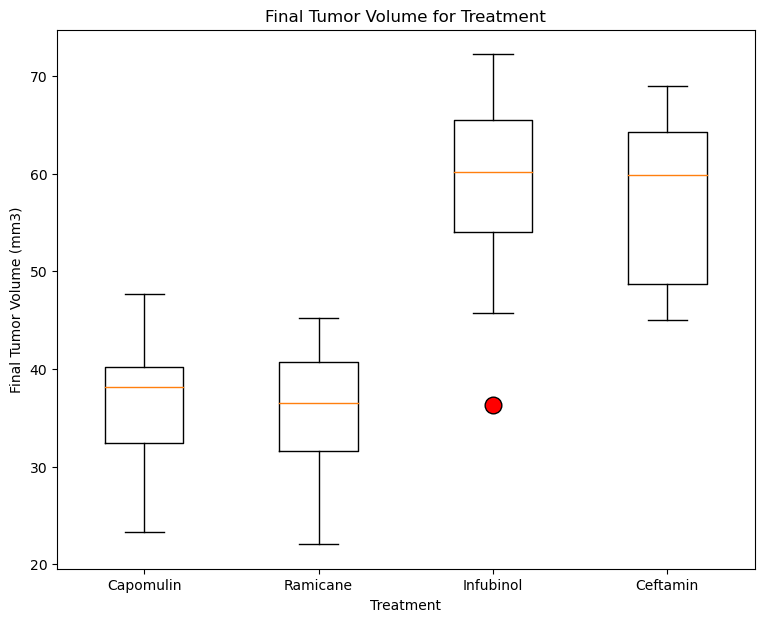

In [54]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group
plt.figure(figsize=(9, 7))
plt.boxplot(tumor_volume, labels= drugs, flierprops=dict(marker='o', markerfacecolor='red', markersize=12))
plt.title('Final Tumor Volume for Treatment')
plt.xlabel('Treatment')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

In [57]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Select mouse treated with Capomulin
capomulin = df1[df1['Drug Regimen'] == 'Capomulin']
capomulin.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21
230,x401,0,45.0,0,Capomulin,Female,16,15
231,l509,0,45.0,0,Capomulin,Male,17,21
232,s710,0,45.0,0,Capomulin,Female,1,23
233,r157,0,45.0,0,Capomulin,Male,22,25
234,u364,0,45.0,0,Capomulin,Male,18,17


In [58]:
c_mouse = capomulin[capomulin['Mouse ID'] == 'r554']

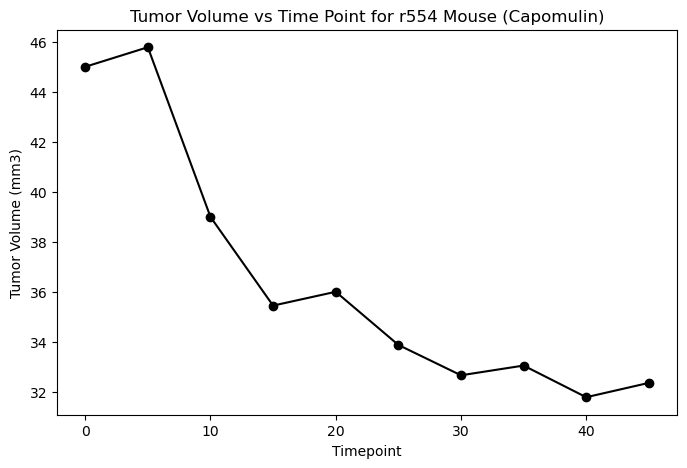

In [63]:
# Generate a line plot of tumor volume vs. time point for a c_mouse ID 554 treated with Capomulin
plt.figure(figsize=(8, 5))
plt.plot(c_mouse['Timepoint'], c_mouse['Tumor Volume (mm3)'], marker='o', color='black', linestyle='-')
plt.title('Tumor Volume vs Time Point for r554 Mouse (Capomulin)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(False)
plt.show()


/var/folders/rb/y3r1w8zs1kg00_cgq7w_sg0w0000gn/T/ipykernel_3193/521507437.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average = capomulin.groupby('Mouse ID').mean()


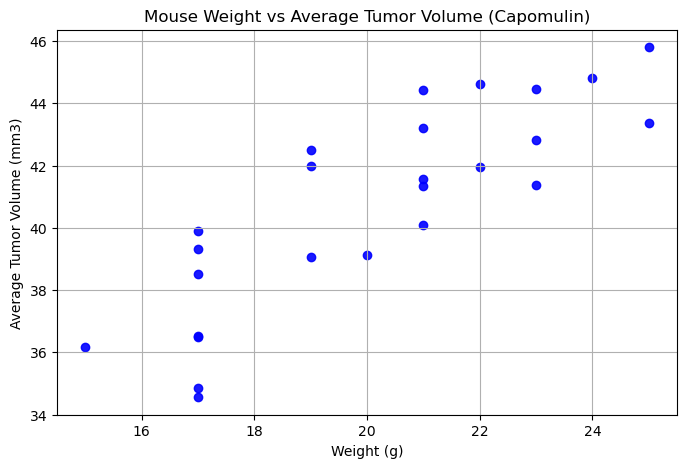

In [66]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
average = capomulin.groupby('Mouse ID').mean()
plt.figure(figsize=(8, 5))
plt.scatter(average['Weight (g)'], average['Tumor Volume (mm3)'], color='blue', alpha=0.9)
plt.title('Mouse Weight vs Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()

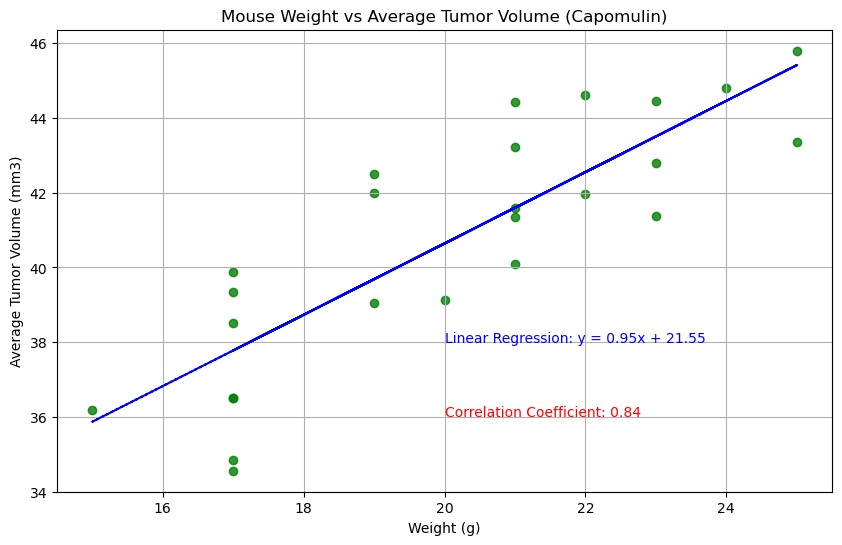

In [71]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation_c = average['Weight (g)'].corr(average['Tumor Volume (mm3)'])
slope, intercept, r_value, p_value, std_err = linregress(average['Weight (g)'], average['Tumor Volume (mm3)'])
plt.figure(figsize=(10, 6))
plt.scatter(average['Weight (g)'], average['Tumor Volume (mm3)'], color='green', alpha=0.8)
plt.title('Mouse Weight vs Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)

plt.plot(average['Weight (g)'], slope * average['Weight (g)'] + intercept, color='blue', linestyle='--')
plt.text(20, 36, f'Correlation Coefficient: {correlation_c:.2f}', fontsize=10, color='red')
plt.text(20, 38, f'Linear Regression: y = {slope:.2f}x + {intercept:.2f}', fontsize=10, color='blue')
plt.show()

In [76]:
print(f'The correlation between mouse weight and the average tumor volume is: {correlation_c:.2f}')

The correlation between mouse weight and the average tumor volume is: 0.84
